In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Create the data and the model

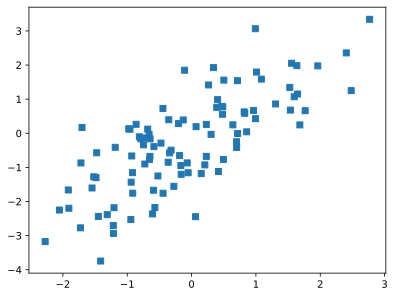

In [18]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x,y,'s')
plt.show()



In [19]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1),
)

In [20]:
learning_rate = .05

lossFn = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)

In [21]:
trainIdx = np.random.choice(range(N),80,replace=False)
trainBool = np.zeros(N,dtype=bool)
trainBool[trainIdx] = True

print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [22]:
num_epoche = 500

for epochI in range(num_epoche):
    
    yHat = ANNreg(x[trainBool])
    
    loss = lossFn(yHat,y[trainBool])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [23]:

predYtest = ANNreg(x[~trainBool])
testLoss = (predYtest - y[~trainBool]).pow(2).mean()

print(f"Final train loss: {loss.detach():.2f}")
print(f"Final test loss: {testLoss.detach():.2f}")


Final train loss: 0.84
Final test loss: 1.13


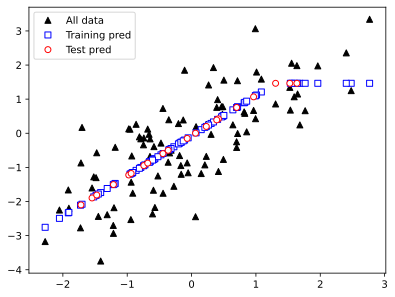

In [24]:

predYtrain = ANNreg(x[trainBool]).detach().numpy()

plt.plot(x,y,'k^',label="All data")
plt.plot(x[trainBool],predYtrain,'bs',markerfacecolor='w',label="Training pred")
plt.plot(x[~trainBool],predYtest.detach(),'ro',markerfacecolor='w',label="Test pred")

plt.legend()
plt.show()